



# Homework 1 Part 1: Pandas

Today, we'll practice data exploration in pandas! Each cell should consist of **a single line of pandas code**, answering the question, unless mentioned that **multiple lines of pandas can be used**. Also, **Instructions are provided before each coding exercise; please follow them accordingly**.




First, download the "Pizza Sales Dataset" from Kaggle.com (https://www.kaggle.com/datasets/nextmillionaire/pizza-sales-dataset?resource=download) and place it in this directory. **Make sure to create a Kaggle account first**.


List of some helpful functions in general:


* read_csv
* head
* unique
* sum
* mean
* median
* groupby
* apply (An important note about this one--pay careful attention to the weird axis argument. When you apply over a series, you often don't need it, but when you apply over a dataframe axis=1 and axis=0 will do very different things.)
* value_counts
* df.columns ('columns' is a dataframe variable that tracks the columns) [note: it is not a function, rather an attribute]
* isin
* fillna
* astype
* hist

## Section A: The Basics Setup (TOTAL POINTS: 04)

***Remember, all answers must be in A SINGLE LINE OF CODE in this section A.*** However if needed, using an additional line for display is allowed.

**(1 POINT)** First, import the pandas library as "pd"

In [43]:
import pandas as pd

**(1 POINT)** Now, read the dataframe and store it in a variable called "df".

In [44]:
df = pd.read_csv("pizza_sales.csv")

**(1 POINT)** Let's get a feel for our dataframe. Print out the list of columns


In [45]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

**(1 POINT)** Now print out the first ten elements. There's a single function that does it by default.

In [46]:
df.head(n=10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6.0,2.0,thai_ckn_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7.0,3.0,ital_supr_m,1.0,1/1/2015,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8.0,3.0,prsc_argla_l,1.0,1/1/2015,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9.0,4.0,ital_supr_m,1.0,1/1/2015,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10.0,5.0,ital_supr_m,1.0,1/1/2015,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


## Section B: Exploration Part 01 (TOTAl POINTS:14)
***Remember, all answers must be in A SINGLE LINE OF CODE in this section B.*** However if needed, using an additional line for display is allowed.

**(2 POINTS)** How many pizza were orderd in **total**?

In [47]:
df["quantity"].sum()

49574.0

**(2 POINTS)** Print out what is the **Median** of **total price**?


In [48]:
df["total_price"].median()

16.5

**(3 POINTS)** Making it a bit more complicated — print out the median of the **'total price'** but only for the pizza_name_id named **'five_cheese_l'**

In [49]:
df[df["pizza_name_id"] == "five_cheese_l"]["total_price"].median()

18.5

**(2 POINTS)** Calculate the **mean 'unit price'** for each unique **'pizza name id'**

Sample answer could be: <br>

bbq_ckn_l        20.75<br>
bbq_ckn_s        12.75
etc.

In [50]:
df.groupby("pizza_name_id")["unit_price"].mean()

pizza_name_id
bbq_ckn_l        20.75
bbq_ckn_m        16.75
bbq_ckn_s        12.75
big_meat_s       12.00
brie_carre_s     23.65
                 ...  
the_greek_xl     25.50
the_greek_xxl    35.95
veggie_veg_l     20.25
veggie_veg_m     16.00
veggie_veg_s     12.00
Name: unit_price, Length: 91, dtype: float64

**(2 POINTS)** Print out the number of pizza by **'pizza size'**.

Your results should look something like: <br>
L      18526 <br>
M      15385 <br>
etc.

In [51]:
df.groupby("pizza_size")["quantity"].sum()

pizza_size
L      18956.0
M      15635.0
S      14403.0
XL       552.0
XXL       28.0
Name: quantity, dtype: float64

**(1 POINT)** Print out the number of pizza by **'pizza name'**..

Your results should look something like: <br>
The Classic Deluxe Pizza                      2416 <br>
The Barbecue Chicken Pizza                    2372 <br>
etc.

In [52]:
df.groupby("pizza_name")["quantity"].sum()

pizza_name
The Barbecue Chicken Pizza                    2432.0
The Big Meat Pizza                            1914.0
The Brie Carre Pizza                           490.0
The Calabrese Pizza                            937.0
The California Chicken Pizza                  2370.0
The Chicken Alfredo Pizza                      987.0
The Chicken Pesto Pizza                        973.0
The Classic Deluxe Pizza                      2453.0
The Five Cheese Pizza                         1409.0
The Four Cheese Pizza                         1902.0
The Greek Pizza                               1420.0
The Green Garden Pizza                         997.0
The Hawaiian Pizza                            2422.0
The Italian Capocollo Pizza                   1438.0
The Italian Supreme Pizza                     1884.0
The Italian Vegetables Pizza                   981.0
The Mediterranean Pizza                        934.0
The Mexicana Pizza                            1484.0
The Napolitana Pizza               

**(2 POINTS)** Print just the line for order date "1/1/2015" and order time "12:21:30". It will print/display **only one row**!

In [53]:
df[(df["order_date"] == "1/1/2015") & (df["order_time"] == "12:21:30")]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
9,10.0,5.0,ital_supr_m,1.0,1/1/2015,12:21:30,16.5,16.5,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


## Section C: Exploration Part 02 : Little bit advanced (TOTAL POINTS: 07)
***In this section C, you can use MULTIPLE LINE OF ANSWERS if needed***

**(3 POINTS)** Q1: Part one: Create a series 'c' by summing the 'quantity' for each unique 'pizza_name'. Then, sort the series 'c' in descending order, storing the result in 'c_sorted'." **hints**: use "sort_values"

In [54]:
c = df.groupby("pizza_name")["quantity"].sum()
c_sorted = c.sort_values(ascending=False)
c_sorted

pizza_name
The Classic Deluxe Pizza                      2453.0
The Barbecue Chicken Pizza                    2432.0
The Hawaiian Pizza                            2422.0
The Pepperoni Pizza                           2418.0
The Thai Chicken Pizza                        2371.0
The California Chicken Pizza                  2370.0
The Sicilian Pizza                            1938.0
The Spicy Italian Pizza                       1924.0
The Southwest Chicken Pizza                   1917.0
The Big Meat Pizza                            1914.0
The Four Cheese Pizza                         1902.0
The Italian Supreme Pizza                     1884.0
The Vegetables + Vegetables Pizza             1526.0
The Mexicana Pizza                            1484.0
The Napolitana Pizza                          1464.0
The Prosciutto and Arugula Pizza              1457.0
The Spinach and Feta Pizza                    1446.0
The Pepper Salami Pizza                       1446.0
The Italian Capocollo Pizza        

**(1 POINT)** Q1: Part2: Now from "c_sorted";  find out which was the most-ordered pizza? **hints: it will be just one line code**

In [55]:
c_sorted.index[c_sorted.argmax()]

'The Classic Deluxe Pizza'

**(3 POINTS)** Display How many pizza from **Classic** category were ordered in **29-10-2015**

In [56]:
df[(df["pizza_category"] == "Classic") & (df["order_date"] == "29-10-2015")]["quantity"].sum()

39.0

## Section D: Modifications : (TOTAL POINTS: 07)
***Remember, all answers must be in A SINGLE LINE OF CODE in this section D.*** However if needed, using an additional line for display is allowed.

Let's start modifying our dataframe! Remember, dataframe operations return a copy by default, so you'll either need to use the inplace=True, or just assign the dataframe back into itself (as in, df = df.someFunction()).

**(2 POINTS)** Take the Pizza Size column and **replace** 'M' with 'Medium' and 'L' with 'Large' in the 'pizza_size' column of the 'df' dataframe. Display the *first 10 rows* of the updated dataframe."

In [57]:
df["pizza_size"].replace({"Medium": "M", "Large": "L"}, inplace=True)
df.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6.0,2.0,thai_ckn_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7.0,3.0,ital_supr_m,1.0,1/1/2015,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8.0,3.0,prsc_argla_l,1.0,1/1/2015,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9.0,4.0,ital_supr_m,1.0,1/1/2015,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10.0,5.0,ital_supr_m,1.0,1/1/2015,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


**(1 POINT)** Now make a new 'revenue' column, which should be total price + 10 dollars, as the company accidentally factored in an old discount.

In [58]:
df["revenue"] = df["total_price"] + 10

**(2 POINTS)** Convert the 'order_date' datetime format using "to_datetime()". Display the updated 'order_date' column.

In [59]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["order_date"]

/var/folders/c_/099s8fjn6s75fb1c5qq8m5p40000gn/T/ipykernel_48054/1800373028.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["order_date"] = pd.to_datetime(df["order_date"])


0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48620, dtype: datetime64[ns]

**(2 POINTS)** Calculate the total revenue for the period from January 1, 2015, to February 28, 2015

In [60]:
df[(df["order_date"] >= "2015-01-01") & (df["order_date"] <= "2015-02-28")]["revenue"].sum()

217129.59999999998

## Section E: Graph Visualization : (TOTAL POINTS: 02)
***Remember, all answers must be in A SINGLE LINE OF CODE in this section E. ***

**(1 POINT)** Let's do some very basic graphing here! Create a histogram for the 'order_date' column. You can set color on your own choice.

<Axes: >

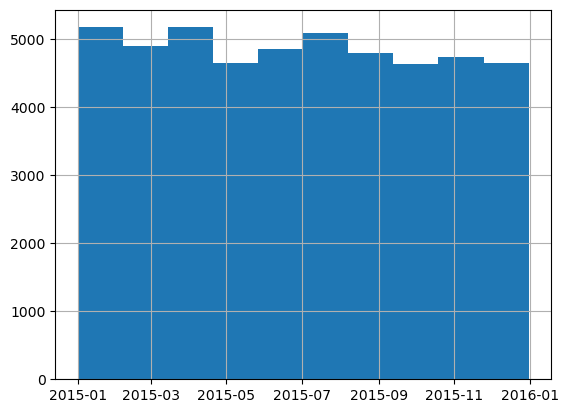

In [61]:
df["order_date"].hist()

**(1 POINT)** Create a plot that visualizes the frequency of each pizza category. Use the 'pizza_category' column from the dataset. **Hints: Think about if it is a continuous data or categorial data.**



<Axes: >

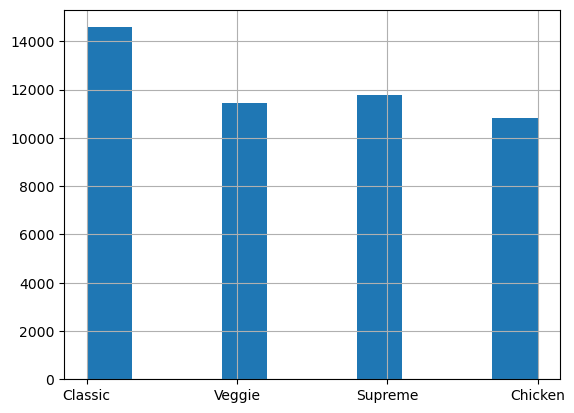

In [62]:
df["pizza_category"].hist()

# ADDITIONAL Bonus Section (TOTAL POINTS: 06)
**Multiple lines code are allowed in this section**

**(5 POINTS)**

Now you need to load another dataset named "costs_ingredients.csv" in the directory.

The company forgot to calculate their profit! Recall that profit is revenue minus total **costs** to the company. You are given a list below of the integredient costs. Using these costs, compute first the total cost of each order, and then the respective revenue. **Hints: You may need to do some python code  with pandas**

In [63]:
costs = pd.read_csv("costs_ingredients.csv")

def helper(x):
    ingredients = x.split(",")
    res = 0
    for ingredient in ingredients:
        res += costs[ingredient] if ingredient in costs.columns else 0
    return res

df["cost"] = df["pizza_ingredients"].apply(helper)
profit = (df["revenue"] - df["cost"]).sum()
profit

-154494.94999999998

**(1 POINT)** Plot a histogram of the profit. Do you see a problem... ?

Explain in a text block below.

<Axes: >

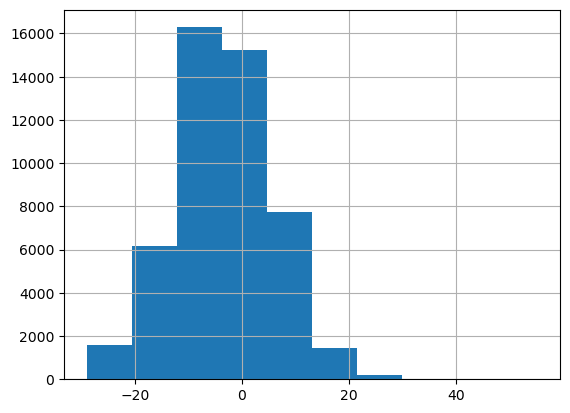

In [64]:
(df["revenue"] - df["cost"]).hist()

The average (and total) profit for the pizza shop is below zero, meaning that they are losing money as a business.